In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import sys
import os
import re

In [2]:
# Value값을 기준으로 내림차순 정렬하는 함수

def descending_order(dic): 
    return dict(sorted(dic.items(), key = lambda item: item[1], reverse = True))


In [3]:
#key_list를 key값을 설정하고, target_list를 key값 기준으로 count하고 value값으로 할당

def count_dict(key_list, target_list):
    result = {}
    
    for key in range(len(key_list)):
        count = 0

        for target in target_list:
            if key_list[key] == target:
                count += 1
            else:
                pass

        result[key_list[key]] = count
        
    return result

In [4]:
#상위 10개 값만 bar차트로 출력하는 함수

def drawbar_top10(dic): 
    x, y = zip(*dic.items()) #key, value 튜플 형식으로 나누기 리턴값은 리스트

    plt.bar(x[:10], y[:10], color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
                                    '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 
                                     '#bcbd22','#17becf'])
    plt.rcParams['figure.figsize'] = [10, 5]

In [5]:
#데이터 파일 한번에 여러개 불러오기

Cus_Info=pd.DataFrame()

for f in glob.glob("C:\\Users\\didrn\\OneDrive\\바탕 화면\\아이펠리.xlsx\\2*.xlsx"):
    data = pd.read_excel(f, engine = 'openpyxl')

    columns = ['결제일자','품목명','품목코드','수량','수취인','주소']
    df = pd.DataFrame(data, columns=columns)
    Cus_Info = Cus_Info.append(df, ignore_index=True)

In [6]:
#구매자 지역 정보 데이터에서 ~시, ~군만 추출한 리스트

df_sigun = Cus_Info["주소"].str.extract('(\w*시)|(\w*군)')

si_list = [i for i in df_sigun.dropna(subset = [0])[0]]

gun_list = [i for i in df_sigun.dropna(subset = [1])[1]]

sell_list = si_list + gun_list

In [7]:
#국내 시, 군 지역 리스트

df_region = pd.read_excel("전국행정동리스트.xlsx", engine = 'openpyxl')

region_list = [i for i in df_region['Unnamed: 1']]

region_set = set(region_list)

region_set.remove('시 / 군')

region_set.update(['광주광역시', '대구광역시', '대전광역시', '부산광역시',
                  '세종특별자치시', '서울특별시', '울산광역시', '인천광역시', '제주시'])

sigun_list = list(region_set)

In [8]:
final_dict = descending_order(count_dict(sigun_list, sell_list)) 

del final_dict['서울특별시']

In [9]:
#서울시에 속하는 행정구 리스트

seoulgu_list = [i for i in df_region[df_region['전국행정동리스트'] == '서울특별시']['Unnamed: 2']]

seoulgu_set = set(seoulgu_list)

seoulgu_list = list(seoulgu_set) 

In [10]:
#~구만 추출한 리스트
df_seoulgu = Cus_Info["주소"].str.extract('(\w*구)')

sell_list = [i for i in df_seoulgu.dropna(subset = [0])[0]] 

seoul_dict = descending_order(count_dict(seoulgu_list, sell_list))

Text(0.5, 1.0, '전국 행정시별 판매량')

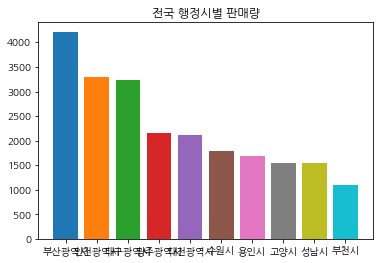

In [11]:
drawbar_top10(final_dict)
plt.title('전국 행정시별 판매량')

Text(0.5, 1.0, '서울시 행정구별 판매량')

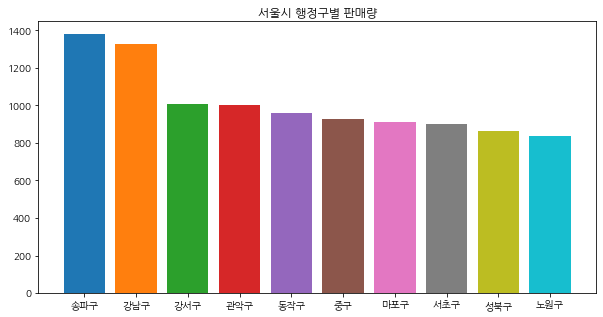

In [12]:
drawbar_top10(seoul_dict)
plt.title('서울시 행정구별 판매량')

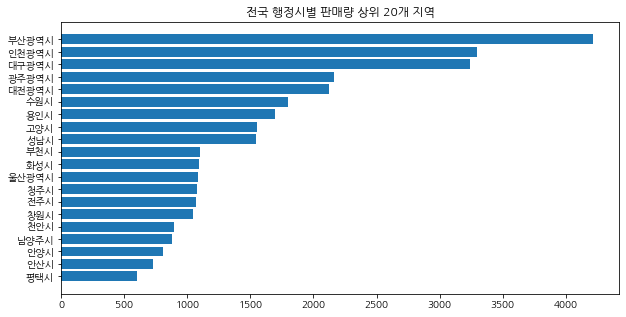

In [13]:
y = np.arange(len(final_dict.keys()))[:20]
region = list(final_dict.keys())[19::-1]
pop = list(final_dict.values())[19::-1]

plt.barh(y, pop)
plt.yticks(y, region)

plt.title("전국 행정시별 판매량 상위 20개 지역")
plt.show()

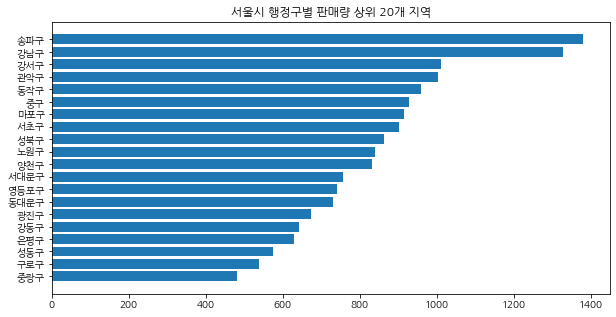

In [14]:
y = np.arange(len(seoul_dict.keys()))[:20]
region = list(seoul_dict.keys())[19::-1]
pop = list(seoul_dict.values())[19::-1]

plt.barh(y, pop)
plt.yticks(y, region)

plt.title("서울시 행정구별 판매량 상위 20개 지역")
plt.show()

In [15]:
#서울시 행정구별 인구 데이터 전처리

data = pd.read_excel("C:\\Users\\didrn\\OneDrive\\바탕 화면\\인구데이터\\Report.xls", engine ='xlrd')

columns = ['행정구역별','구분', '15~19세', '20~24세', '25~29세', '30~34세', '35~39세',
          '40~44세', '45~49세']
df_seoul = pd.DataFrame(data, columns = columns)
df_seoul = df_seoul[df_seoul.구분 == "계"]
df_seoul = df_seoul.drop(0)
df_seoul['total'] = df_seoul['15~19세']+df_seoul['20~24세']+df_seoul['25~29세']+df_seoul['30~34세']+df_seoul['35~39세']+df_seoul['40~44세']+df_seoul['45~49세']

seoul = {}

total_list = [i for i in df_seoul.total]
    
for i in range(len(total_list)):
    seoul[df_seoul["행정구역별"].iloc[i]] = total_list[i]
    
seoul = descending_order(seoul)

In [16]:
#전국 행정시별 인구 데이터 전처리
pop_info=pd.DataFrame()

for f in glob.glob("C:\\Users\\didrn\\OneDrive\\바탕 화면\\인구데이터\\1*.xlsx"):
    data = pd.read_excel(f, engine = 'openpyxl')

    columns = ['행정기관','10~19세','20~29세','30~39세','40~49세']
    df = pd.DataFrame(data, columns=columns)
    pop_info = pop_info.append(df, ignore_index=True)

total = []
a = [int(re.sub(',','', i)) for i in pop_info['10~19세']]
b = [int(re.sub(',','', i)) for i in pop_info['20~29세']]
c = [int(re.sub(',','', i)) for i in pop_info['30~39세']]
d = [int(re.sub(',','', i)) for i in pop_info['40~49세']]

for i in range(len(a)):
    temp = a[i] + b[i] + c[i] + d[i]
    total.append(temp)
    
pop_info['total'] = total

nation = {}

total_list = [i for i in pop_info.total]
    

for i in range(len(total_list)):
    nation[pop_info["행정기관"].iloc[i]] = total_list[i]
    
nation = descending_order(nation)

Text(0.5, 1.0, '전국 행정시별 10~40대 인구통계 상위 10개 지역')

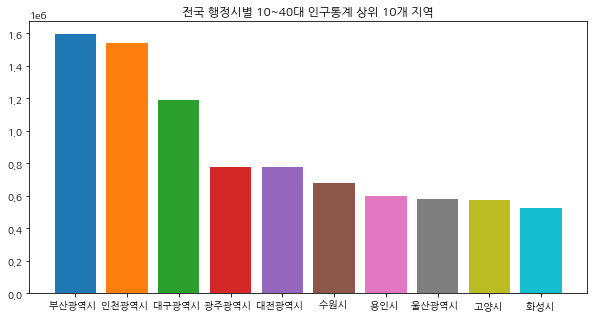

In [17]:
drawbar_top10(nation)
plt.title('전국 행정시별 10~40대 인구통계 상위 10개 지역')

Text(0.5, 1.0, '서울시 행정구별 10~40대 인구통계 상위 10개 지역')

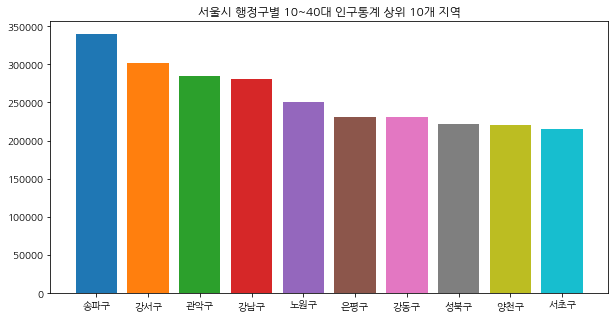

In [18]:
drawbar_top10(seoul)
plt.title('서울시 행정구별 10~40대 인구통계 상위 10개 지역')

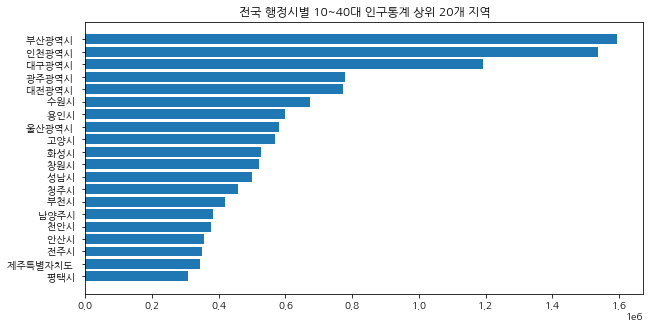

In [19]:
y = np.arange(len(nation.keys()))[:20]
region = list(nation.keys())[19::-1]
pop = list(nation.values())[19::-1]

plt.barh(y, pop)
plt.yticks(y, region)

plt.title("전국 행정시별 10~40대 인구통계 상위 20개 지역")
plt.show()

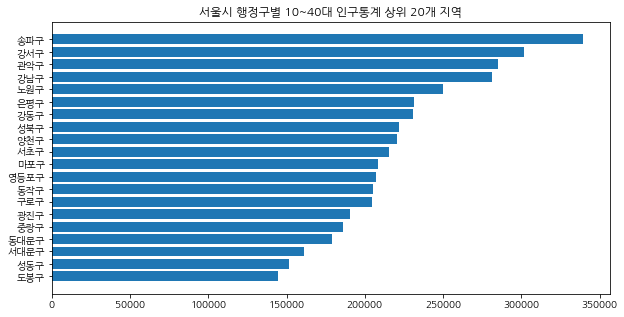

In [20]:
y = np.arange(len(seoul.keys()))[:20]
region = list(seoul.keys())[19::-1]
pop = list(seoul.values())[19::-1]

plt.barh(y, pop)
plt.yticks(y, region)

plt.title("서울시 행정구별 10~40대 인구통계 상위 20개 지역")
plt.show()